<a href="https://colab.research.google.com/github/nhiduong611/MAT421/blob/main/Module_H_22_4_22_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Error and Instability



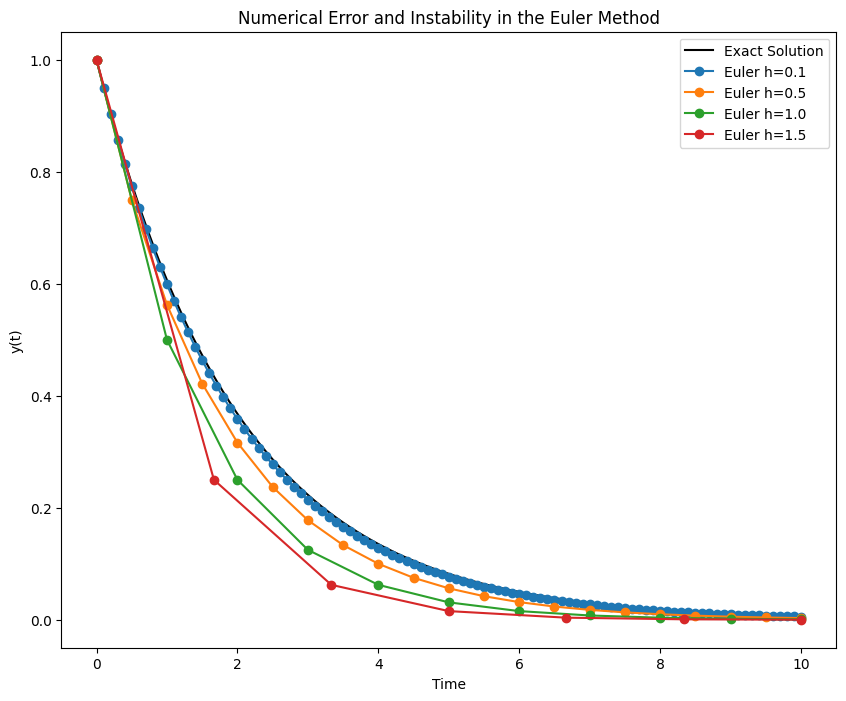

In [2]:
# solve ODE dy/dt=-ky, k>0, y(0)=y0, y(t)=y0e^(-kt)
import numpy as np
import matplotlib.pyplot as plt

# Define the function that represents dy/dt
def dydt(y, k):
    return -k * y

# Exact solution
def exact_solution(t, y0, k):
    return y0 * np.exp(-k * t)

# Euler method implementation
def euler_method(k, y0, t_end, h):
    N = int(t_end / h)
    t = np.linspace(0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] + h * dydt(y[i], k)
    return t, y

# Parameters
k = 0.5
y0 = 1
t_end = 10

# Different step sizes
step_sizes = [0.1, 0.5, 1.0, 1.5]

plt.figure(figsize=(10, 8))

# Exact solution
t_exact = np.linspace(0, t_end, 1000)
y_exact = exact_solution(t_exact, y0, k)
plt.plot(t_exact, y_exact, 'k', label='Exact Solution')

# Numerical solutions for different step sizes
for h in step_sizes:
    t, y = euler_method(k, y0, t_end, h)
    plt.plot(t, y, '-o', label=f'Euler h={h}')

plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.title('Numerical Error and Instability in the Euler Method')
plt.show()


Predictor-Corrector Methods



In [1]:
# Solve dy/dt=f(t,y)=y−t^2+1, y(0)=0.5 over [0,2] with s step size h=0.2
import numpy as np

# Define the function f(t, y)
def f(t, y):
    return y - t**2 + 1

# Initial conditions
t0 = 0
y0 = 0.5
t_end = 2
h = 0.2

# Number of steps
N = int((t_end - t0) / h)

# Initialize arrays to store t and y values
t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros(N + 1)

# Initial value
y_values[0] = y0

# Euler method to start (for the first step)
y_values[1] = y_values[0] + h * f(t_values[0], y_values[0])

# Predictor-Corrector method
for i in range(1, N):
    # Predictor (Adams-Bashforth two-step)
    y_predict = y_values[i] + (3*h/2)*f(t_values[i], y_values[i]) - (h/2)*f(t_values[i-1], y_values[i-1])

    # Corrector (Adams-Moulton)
    y_values[i+1] = y_values[i] + (h/2)*(f(t_values[i+1], y_predict) + f(t_values[i], y_values[i]))

# Display results
for t, y in zip(t_values, y_values):
    print(f"t = {t:.2f}, y = {y:.4f}")


t = 0.00, y = 0.5000
t = 0.20, y = 0.8000
t = 0.40, y = 1.1778
t = 0.60, y = 1.6043
t = 0.80, y = 2.0723
t = 1.00, y = 2.5733
t = 1.20, y = 3.0968
t = 1.40, y = 3.6302
t = 1.60, y = 4.1577
t = 1.80, y = 4.6605
t = 2.00, y = 5.1152
